In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_csv('data/titanic/train.csv')
test_df=pd.read_csv('data/titanic/test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train_df=train_df.drop(['PassengerId','Name','Ticket'],axis=1)


In [7]:
test_df=test_df.drop(['Name','Ticket'],axis=1)

In [8]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
train_df.Embarked.fillna('S',inplace=True)

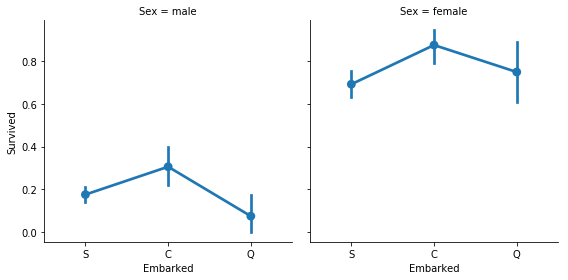

In [11]:
sns.factorplot('Embarked', 'Survived',col='Sex',data=train_df)

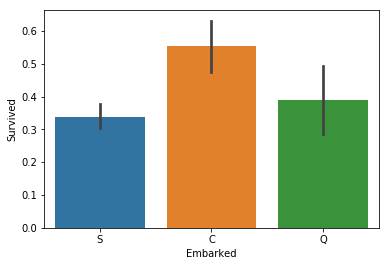

In [12]:
sns.barplot("Embarked",'Survived',data=train_df)

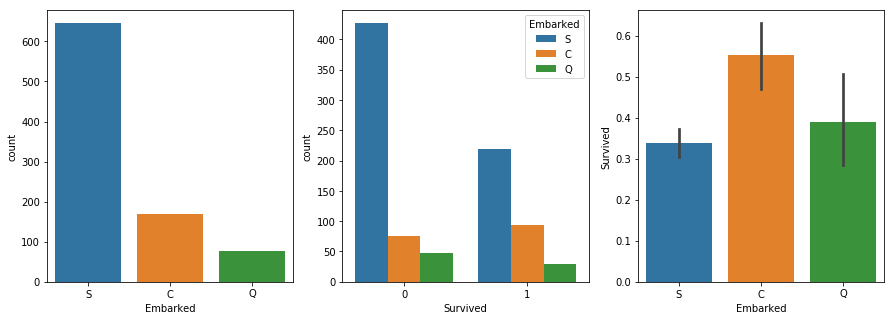

In [13]:
fig, axe=plt.subplots(1,3, figsize=(15,5))
sns.countplot(train_df.Embarked, ax=axe[0])
sns.countplot(train_df.Survived, hue=train_df.Embarked, ax=axe[1])
sns.barplot(train_df.Embarked, train_df.Survived, ax=axe[2], order=['S','C','Q'])
plt.show()

In [14]:
embark_dummy=pd.get_dummies(train_df.Embarked,prefix='Embark')
embark_dummy.columns

Index(['Embark_C', 'Embark_Q', 'Embark_S'], dtype='object')

In [15]:

embark_dummy1=pd.get_dummies(test_df.Embarked,prefix='Embark')
embark_dummy1.columns

Index(['Embark_C', 'Embark_Q', 'Embark_S'], dtype='object')

In [16]:
embark_dummy.drop(['Embark_S'],axis=1, inplace=True)
embark_dummy1.drop(['Embark_S'],axis=1, inplace=True)
train_df=pd.concat([train_df, embark_dummy],axis=1)
test_df=pd.concat([test_df, embark_dummy1],axis=1)
train_df.drop(['Embarked'],inplace=True, axis=1)
test_df.drop(['Embarked'],inplace=True, axis=1)

In [17]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embark_C', 'Embark_Q'],
      dtype='object')

In [18]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embark_C', 'Embark_Q'],
      dtype='object')

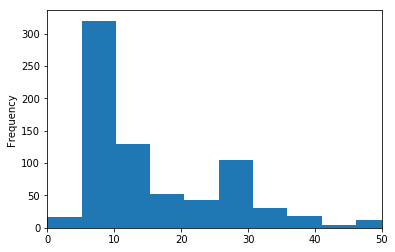

In [19]:
train_df.Fare.plot.hist(bins=100, xlim=(0,50))

In [20]:
train_df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [21]:
def get_randomized(data):
    mean_v=data.mean()
    std=data.std()
    size=data.isnull().sum()
    return np.random.randint(mean_v-std, mean_v+std, size=size)

get_randomized(test_df.Age)

array([43, 32, 40, 17, 37, 23, 37, 37, 42, 21, 16, 28, 31, 21, 16, 33, 22,
       37, 40, 18, 22, 17, 40, 21, 31, 32, 23, 36, 39, 16, 28, 39, 29, 19,
       34, 23, 28, 16, 33, 28, 16, 24, 37, 29, 40, 19, 32, 30, 39, 36, 20,
       23, 26, 24, 39, 43, 39, 43, 27, 41, 38, 16, 21, 17, 31, 35, 17, 19,
       16, 41, 24, 16, 35, 31, 24, 31, 23, 26, 21, 42, 29, 17, 26, 41, 32,
       21])

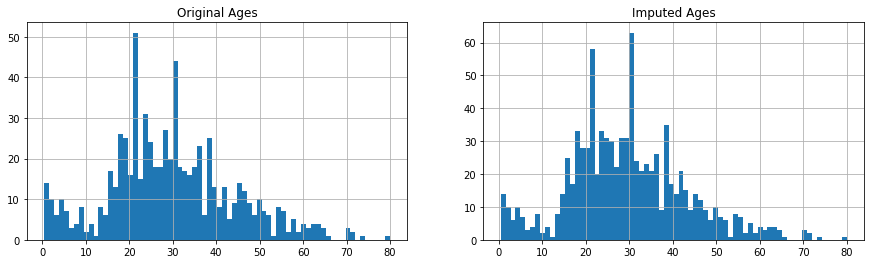

In [22]:
fix, axe=plt.subplots(1,2,figsize=(15,4))
axe[0].set_title('Original Ages')
axe[1].set_title('Imputed Ages')

train_df.Age.dropna().hist(bins=70, ax=axe[0])
train_df.Age[train_df.Age.isnull()]=get_randomized(train_df.Age)
train_df.Age.hist(bins=70,ax=axe[1])

In [23]:
train_df.Age.isnull().sum()

0

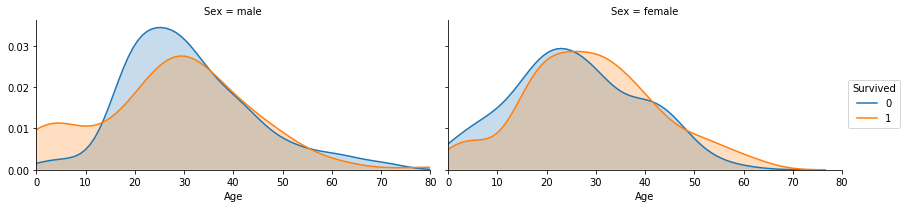

In [24]:
facet=sns.FacetGrid(train_df, hue='Survived',col='Sex', aspect=2)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0,train_df.Age.max()))
facet.add_legend()

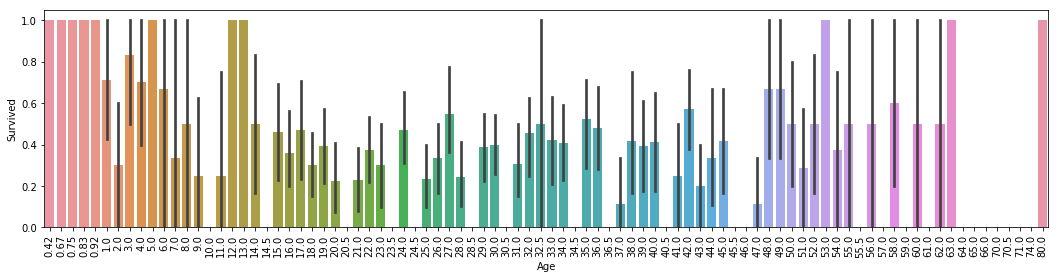

In [27]:
plt.figure(figsize=(18,4))
sns.barplot(train_df.Age, train_df.Survived)
plt.xticks(rotation=90)
plt.show()

In [28]:
avg=train_df.Survived.groupby(train_df.Age).mean()
avg

Age
0.42     1.000000
0.67     1.000000
0.75     1.000000
0.83     1.000000
0.92     1.000000
1.00     0.714286
2.00     0.300000
3.00     0.833333
4.00     0.700000
5.00     1.000000
6.00     0.666667
7.00     0.333333
8.00     0.500000
9.00     0.250000
10.00    0.000000
11.00    0.250000
12.00    1.000000
13.00    1.000000
14.00    0.500000
14.50    0.000000
15.00    0.461538
16.00    0.360000
17.00    0.470588
18.00    0.303030
19.00    0.392857
20.00    0.222222
20.50    0.000000
21.00    0.230769
22.00    0.375000
23.00    0.300000
           ...   
44.00    0.333333
45.00    0.416667
45.50    0.000000
46.00    0.000000
47.00    0.111111
48.00    0.666667
49.00    0.666667
50.00    0.500000
51.00    0.285714
52.00    0.500000
53.00    1.000000
54.00    0.375000
55.00    0.500000
55.50    0.000000
56.00    0.500000
57.00    0.000000
58.00    0.600000
59.00    0.000000
60.00    0.500000
61.00    0.000000
62.00    0.500000
63.00    1.000000
64.00    0.000000
65.00    0.000000
66.00 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87]), <a list of 88 Text xticklabel objects>)

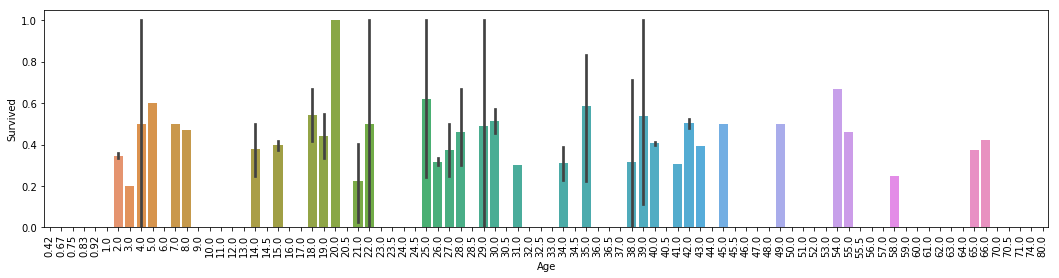

In [32]:
# Don't do this. The length of avg != the length of train_df.Age.
plt.figure(figsize=(18,4))
sns.barplot(train_df.Age, avg)
plt.xticks(rotation=90)

In [29]:
print(len(avg),train_df.Age.shape,)

88 (891,)


In [30]:
avgdata=train_df[['Survived','Age']].groupby('Age').mean().reset_index()
avgdata

,Age,Survived
0,0.42,1.000000
1,0.67,1.000000
2,0.75,1.000000
3,0.83,1.000000
4,0.92,1.000000
5,1.00,0.714286
6,2.00,0.300000
7,3.00,0.833333
8,4.00,0.700000
9,5.00,1.000000


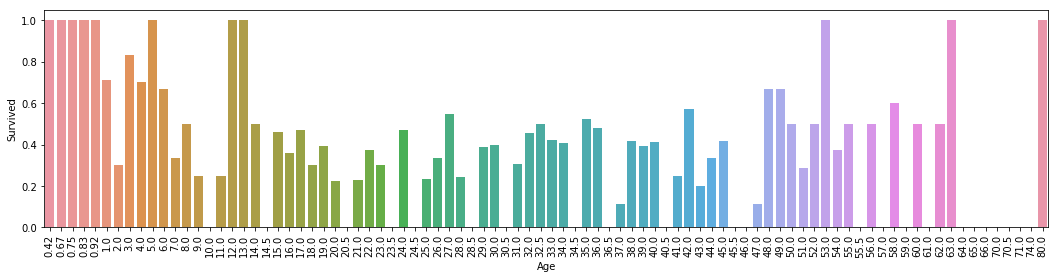

In [31]:
plt.figure(figsize=(18,4))
sns.barplot(avgdata.Age, avgdata.Survived)
plt.xticks(rotation=90)
plt.show()

In [33]:
train_df.Cabin.value_counts()

G6                 4
B96 B98            4
C23 C25 C27        4
F2                 3
F33                3
C22 C26            3
D                  3
E101               3
C126               2
F4                 2
E67                2
B22                2
B18                2
B35                2
B57 B59 B63 B66    2
B58 B60            2
C78                2
C68                2
C93                2
C123               2
E33                2
C125               2
E25                2
D26                2
C92                2
E24                2
D33                2
B20                2
C124               2
E44                2
                  ..
C90                1
C49                1
E38                1
D21                1
D47                1
A36                1
E31                1
D49                1
B78                1
E68                1
D56                1
C30                1
A5                 1
E10                1
A24                1
E17                1
D48          

In [34]:
train_df.drop(['Cabin'],axis=1, inplace=True)
test_df.drop(['Cabin'],axis=1, inplace=True)

In [35]:
def handle_family(data):
    data['Family']=data.Parch+data.SibSp
    data['Family'][data.Family>0]=1
    return data.drop(['SibSp','Parch'],axis=1)

train_df=handle_family(train_df)
test_df=handle_family(test_df)


In [36]:
train_df.sample(3)

,Survived,Pclass,Sex,Age,Fare,Embark_C,Embark_Q,Family
869,1,3,male,4.0,11.1333,0,0,1
201,0,3,male,40.0,69.5500,0,0,1
535,1,2,female,7.0,26.2500,0,0,1


In [37]:
family_data=train_df[['Family','Survived']].groupby('Family', as_index=False).mean()
family_data.columns

Index(['Family', 'Survived'], dtype='object')

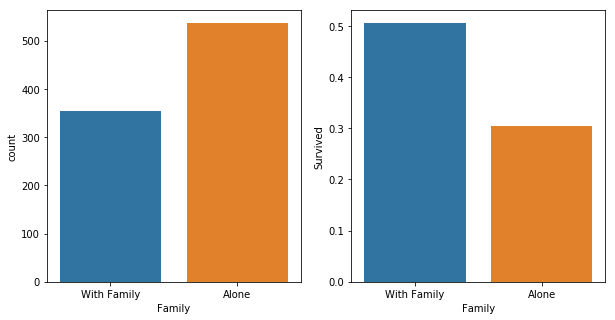

In [38]:
f, axe=plt.subplots(1,2,sharex=True, figsize=(10,5))
sns.countplot(train_df.Family, order=[1,0],ax=axe[0])
sns.barplot('Family','Survived',data=family_data, order=[1,0],ax=axe[1])
axe[0].set_xticklabels(['With Family','Alone'],rotation=0)
plt.show()


In [39]:
type(axe[0])

matplotlib.axes._subplots.AxesSubplot

In [40]:
def get_person(passenger):
    age, sex=passenger
    return 'Child' if age<16 else sex

def handle_person(data):
    data['Person']=data[['Age','Sex']].apply(get_person, axis=1)
    return data.drop('Sex',axis=1)

train_df=handle_person(train_df)
test_df=handle_person(test_df)
train_df.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Embark_C', 'Embark_Q', 'Family',
       'Person'],
      dtype='object')

In [41]:
train_df.sample(3)

,Survived,Pclass,Age,Fare,Embark_C,Embark_Q,Family,Person
554,1,3,22.0,7.7750,0,0,0,female
61,1,1,38.0,80.0000,0,0,0,female
124,0,1,54.0,77.2875,0,0,1,male


In [42]:
pd.get_dummies(train_df.Person).columns

Index(['Child', 'female', 'male'], dtype='object')

In [49]:
def dummy_person(data):
    dummy=pd.get_dummies(data['Person'])
    dummy.drop('male',axis=1, inplace=True)
    return pd.concat([data, dummy], axis=1)



In [50]:
train_df.head(5)

,Survived,Pclass,Age,Fare,Embark_C,Embark_Q,Family,Person
0,0,3,22.0,7.2500,0,0,1,male
1,1,1,38.0,71.2833,1,0,1,female
2,1,3,26.0,7.9250,0,0,0,female
3,1,1,35.0,53.1000,0,0,1,female
4,0,3,35.0,8.0500,0,0,0,male


In [51]:
dummy_person(train_df).head(3)

,Survived,Pclass,Age,Fare,Embark_C,Embark_Q,Family,Person,Child,female
0,0,3,22.0,7.2500,0,0,1,male,0,0
1,1,1,38.0,71.2833,1,0,1,female,0,1
2,1,3,26.0,7.9250,0,0,0,female,0,1


In [52]:
train_df=dummy_person(train_df)
test_df=dummy_person(test_df)
test_df.columns

Index(['PassengerId', 'Pclass', 'Age', 'Fare', 'Embark_C', 'Embark_Q',
       'Family', 'Person', 'Child', 'female'],
      dtype='object')

In [53]:
train_df.head(3)

,Survived,Pclass,Age,Fare,Embark_C,Embark_Q,Family,Person,Child,female
0,0,3,22.0,7.2500,0,0,1,male,0,0
1,1,1,38.0,71.2833,1,0,1,female,0,1
2,1,3,26.0,7.9250,0,0,0,female,0,1


In [56]:
train_df.Survived.groupby(train_df.Person).mean().reset_index()

,Person,Survived
0,Child,0.560440
1,female,0.754647
2,male,0.165725


In [57]:
person_data=train_df[['Person','Survived']].groupby('Person', as_index=False).mean()
person_data

,Person,Survived
0,Child,0.560440
1,female,0.754647
2,male,0.165725


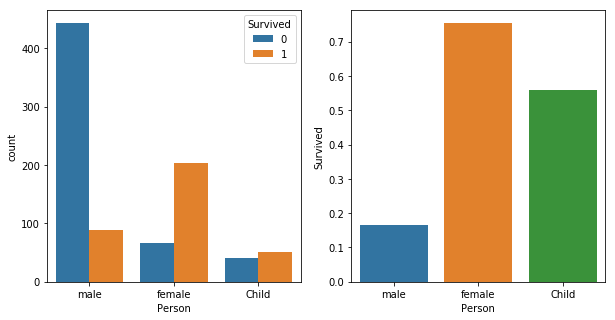

In [61]:
f, (axis1, axis2)=plt.subplots(1,2, figsize=(10,5))
#axis1.yaxis.grid(True)
sns.countplot(train_df.Person, hue=train_df.Survived,ax=axis1)
sns.barplot(person_data.Person, person_data.Survived, ax=axis2, order=['male','female','Child'])
#sns.axes_style({'axes.grid':True})


In [62]:
train_df.drop('Person',axis=1, inplace=True)
test_df.drop('Person',axis=1, inplace=True)

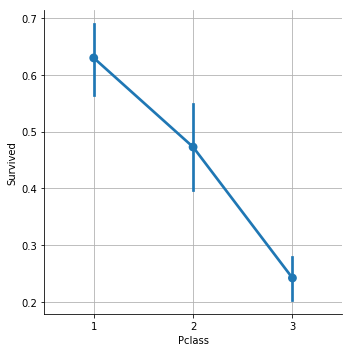

In [63]:
sns.factorplot('Pclass','Survived',data=train_df, order=[1,2,3],size=5)
plt.grid(True)
plt.show()

In [64]:
pd.get_dummies(train_df.Pclass).columns

Int64Index([1, 2, 3], dtype='int64')

In [65]:
def dummy_pclass(data):
    dummy=pd.get_dummies(data['Pclass'])
    dummy.columns=['Class 1','Class 2','Class 3']
    dummy.drop('Class 3', axis=1, inplace=True)
    data=pd.concat([data, dummy], axis=1)
    return data.drop('Pclass',axis=1)

In [66]:
dummy_pclass(train_df).head(3)

,Survived,Age,Fare,Embark_C,Embark_Q,Family,Child,female,Class 1,Class 2
0,0,22.0,7.2500,0,0,1,0,0,0,0
1,1,38.0,71.2833,1,0,1,0,1,1,0
2,1,26.0,7.9250,0,0,0,0,1,0,0


In [67]:
train_df=dummy_pclass(train_df)   
test_df=dummy_pclass(test_df)
train_df.head(3)

,Survived,Age,Fare,Embark_C,Embark_Q,Family,Child,female,Class 1,Class 2
0,0,22.0,7.2500,0,0,1,0,0,0,0
1,1,38.0,71.2833,1,0,1,0,1,1,0
2,1,26.0,7.9250,0,0,0,0,1,0,0


In [68]:
train_df.isnull().sum()

Survived    0
Age         0
Fare        0
Embark_C    0
Embark_Q    0
Family      0
Child       0
female      0
Class 1     0
Class 2     0
dtype: int64

In [69]:
y_train=train_df.Survived
x_train=train_df.drop('Survived',axis=1)

In [70]:
x_test=test_df.drop("PassengerId",axis=1).copy()

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [72]:
clf_log=LogisticRegression()
clf_log.fit(x_train, y_train)
clf_log.score(x_train, y_train)

0.80695847362514028

In [75]:
clf_svc=SVC()
clf_svc.fit(x_train, y_train)
clf_svc.score(x_train, y_train)

0.86756453423120095

In [77]:
clf_random=RandomForestClassifier(n_estimators=100)
clf_random.fit(x_train, y_train)
clf_random.score(x_train, y_train)

0.98765432098765427

In [79]:
clf_knn=KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(x_train, y_train)
clf_knn.score(x_train, y_train)

0.82154882154882158

In [80]:
clf_nb=GaussianNB()
clf_nb.fit(x_train, y_train)
clf_nb.score(x_train, y_train)

0.75420875420875422

In [81]:
y_pred=clf_random.predict(x_train)

In [85]:
importance=pd.DataFrame({"features":x_train.columns, 'importance':clf_random.feature_importances_})

In [88]:
importance.sort_values(by='importance', ascending=False).reset_index(drop=True)

,features,importance
0,Age,0.298099
1,Fare,0.296680
2,female,0.227339
3,Class 1,0.051862
4,Class 2,0.042875
5,Family,0.025499
6,Embark_C,0.021913
7,Child,0.020278
8,Embark_Q,0.015455


In [100]:
clf_log.intercept_

array([-1.75617583])

In [89]:
clf_log.coef_

array([[ -2.33790828e-02,   9.06278689e-04,   5.86201931e-01,
          3.15661431e-01,  -2.00399812e-01,   1.71291000e+00,
          2.73060567e+00,   2.01706750e+00,   1.12690155e+00]])

In [101]:
clf_log.coef_[0]

array([ -2.33790828e-02,   9.06278689e-04,   5.86201931e-01,
         3.15661431e-01,  -2.00399812e-01,   1.71291000e+00,
         2.73060567e+00,   2.01706750e+00,   1.12690155e+00])

In [99]:
pd.DataFrame({'Features':x_train.columns, 'coeff':clf_log.coef_[0]})

,Features,coeff
0,Age,-0.023379
1,Fare,0.000906
2,Embark_C,0.586202
3,Embark_Q,0.315661
4,Family,-0.200400
5,Child,1.712910
6,female,2.730606
7,Class 1,2.017068
8,Class 2,1.126902
